In [2]:
import pandas as pd

In [2]:
df = pd.read_csv("tutorial.csv")

In [3]:
df.head()

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722
2,-1.062870,-0.503704,-0.238536,-1.417937
3,0.437078,0.362640,-0.111228,-1.649853


In [4]:
df.col0

0   -0.722876
1    1.160396
2   -1.062870
3    0.437078
Name: col0, dtype: float64

In [5]:
df['col0']

0   -0.722876
1    1.160396
2   -1.062870
3    0.437078
Name: col0, dtype: float64

In [6]:
df[['col0']]

,col0
0,-0.722876
1,1.160396
2,-1.062870
3,0.437078


In [7]:
df.loc[:, 'col0']

0   -0.722876
1    1.160396
2   -1.062870
3    0.437078
Name: col0, dtype: float64

In [8]:
df.loc[:, ['col0']]

,col0
0,-0.722876
1,1.160396
2,-1.062870
3,0.437078


In [9]:
df.iloc[:,0]

0   -0.722876
1    1.160396
2   -1.062870
3    0.437078
Name: col0, dtype: float64

In [10]:
df.iloc[:,[0]]

,col0
0,-0.722876
1,1.160396
2,-1.062870
3,0.437078


In [11]:
df.ix[:, 0]

0   -0.722876
1    1.160396
2   -1.062870
3    0.437078
Name: col0, dtype: float64

In [12]:
df[0:1]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378


In [14]:
df.iloc[0:1,:]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378


In [15]:
df.col0 < 0  # boolean indexing

0     True
1    False
2     True
3    False
Name: col0, dtype: bool

In [16]:
df[df.col0 < 0]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
2,-1.062870,-0.503704,-0.238536,-1.417937


In [19]:
df[ (df.col0 <0) & (df.col1 < 0) ]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
2,-1.062870,-0.503704,-0.238536,-1.417937


In [20]:
df[ (df.col0 <0) | (df.col1 < 0) ]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722
2,-1.062870,-0.503704,-0.238536,-1.417937


In [21]:
df[ df < 0] = -100  # writing to a slice

In [22]:
df

,col0,col1,col2,col3
0,-100.000000,-100.00000,1.309208,0.232378
1,1.160396,-100.00000,0.677368,1.044722
2,-100.000000,-100.00000,-100.000000,-100.000000
3,0.437078,0.36264,-100.000000,-100.000000


In [23]:
#Convert ordinal categorical features into numerical features
income_ordered = [ '$1 - $100', '$1000 - $100000', '$10000 - $50000', '$50000 - $100000', '+$100000']

In [24]:
income_ordered

['$1 - $100',
 '$1000 - $100000',
 '$10000 - $50000',
 '$50000 - $100000',
 '+$100000']

In [29]:
df = pd.DataFrame({ 'income': ['$10000 - $50000', '$50000 - $100000', '$1 - $100', '$1000 - $10000', '$10000 - $50000', '$50000 - $100000', '$+100000', '+$100000']})

In [30]:
df

,income
0,$10000 - $50000
1,$50000 - $100000
2,$1 - $100
3,$1000 - $10000
4,$10000 - $50000
5,$50000 - $100000
6,$+100000
7,+$100000


In [31]:
df.income = df.income.astype("category", ordered=True, categories=income_ordered).cat.codes

In [32]:
df

,income
0,2
1,3
2,0
3,-1
4,2
5,3
6,-1
7,4


In [4]:
df = pd.DataFrame({'vertebrates': [
            'Bird',
            'Bird',
            'Mammal',
            'Fish',
            'Amphibian',
            'Reptile',
            'Mammal'
        ]})
print df

  vertebrates
0        Bird
1        Bird
2      Mammal
3        Fish
4   Amphibian
5     Reptile
6      Mammal


In [8]:
df_vertebrates = pd.get_dummies(df,columns=['vertebrates'])
print df_vertebrates

   vertebrates_Amphibian  vertebrates_Bird  vertebrates_Fish  \
0                    0.0               1.0               0.0   
1                    0.0               1.0               0.0   
2                    0.0               0.0               0.0   
3                    0.0               0.0               1.0   
4                    1.0               0.0               0.0   
5                    0.0               0.0               0.0   
6                    0.0               0.0               0.0   

   vertebrates_Mammal  vertebrates_Reptile  
0                 0.0                  0.0  
1                 0.0                  0.0  
2                 1.0                  0.0  
3                 0.0                  0.0  
4                 0.0                  0.0  
5                 0.0                  1.0  
6                 1.0                  0.0  


In [9]:
df.vertebrates = df.vertebrates.astype("category").cat.codes

In [10]:
df

,vertebrates
0,1
1,1
2,3
3,2
4,0
5,4
6,3


In [11]:
df.vertebrates

0    1
1    1
2    3
3    2
4    0
5    4
6    3
Name: vertebrates, dtype: int8

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
corpus = [
    "Gautam ran faster than Harry because he is an athlete.",
    "Gautam and Harry ran faster and faster.",
]

bow = CountVectorizer()
X = bow.fit_transform(corpus)  # Sparse Matrix

print bow.get_feature_names()

print X.toarray()

[u'an', u'and', u'athlete', u'because', u'faster', u'gautam', u'harry', u'he', u'is', u'ran', u'than']
[[1 0 1 1 1 1 1 1 1 1 1]
 [0 2 0 0 2 1 1 0 0 1 0]]


In [17]:
print bow.get_stop_words()

None


In [28]:
#Images

from scipy import misc

img = misc.imread('jensen.png')
print type(img)
print img.shape, img.dtype

#shrink the image down for the faster compute
img = img[::2, ::2]

# Optionally scale the colors from 0-255 to 0-1
#Also reshape to a 1D array
img = (img / 255.0).reshape(1, 3)

red = img[:,0]
green = img[:,1]
blue = img[:,2]

gray = (0.299*red + 0.587*green + 0.114*blue)

print img.shape
print gray.shape

<type 'numpy.ndarray'>
(273L, 424L, 4L) uint8


ValueError: total size of new array must be unchanged

In [29]:
#review
features = [
    "The enchanted forest beamed with magic once the prince was born.",
    "Jinto's life changed forever when his planet surrendered without firing a single shot."
]

In [30]:
features

['The enchanted forest beamed with magic once the prince was born.',
 "Jinto's life changed forever when his planet surrendered without firing a single shot."]

In [35]:
features_count = bow.fit_transform(features)
print features_count.toarray()
print bow.get_feature_names()

[[1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 2 1 0 1 0]
 [0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1]]
[u'beamed', u'born', u'changed', u'enchanted', u'firing', u'forest', u'forever', u'his', u'jinto', u'life', u'magic', u'once', u'planet', u'prince', u'shot', u'single', u'surrendered', u'the', u'was', u'when', u'with', u'without']


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("demo.csv", sep='\t')
print df
print df.Unemployed.isnull()  # NaN testing function returns a boolean array
print df.notnull()  # same thing for all data 
print df.fillna(0) # completely fill every single record with sclar value

print df.fillna(method='ffill', limit=1)  # forward fill with previous value
print df.interpolate(method='polynomial', order=2) #Interprolate w/ ploynomial
df.dropna(axis=0) # drop all rows with holes
df.dropna(axis=1) # drop all columns 


print df.drop_duplicates(subset=['Major_category', 'Total']).reset_index()

              clientid,date,weekdays,gains,prices,up
0  0,2008-04-30,Wed,-0.52458192906686452,7791404....
1  1,2008-05-01,Thu,0.076191536201738269,3167180....
2  2,2008-05-02,Fri,-0.86850970062880861,9589766....
3  3,2008-05-03,Sat,-0.42701083852713395,8949415....
4  4,2008-05-04,Sun,0.2532553652693274,937163.443...
5  5,2008-05-05,Mon,-0.68151636911081892,949579.8...
6  6,2008-05-06,Tue,0.0071911579626532168,7268426...
7  7,2008-05-07,Wed,0.67449747200412147,7517014.7...
8  8,2008-05-08,Thu,-1.1841008656818983,1920959.5...
9  9,2008-05-09,Fri,-1.5803692595811152,8456240.6...


AttributeError: 'DataFrame' object has no attribute 'gains'

In [5]:
import pandas as pd

# TODO: Load up the 'tutorial.csv' dataset
#
# .. your code here ..
df = pd.read_csv("tutorial.csv")


# TODO: Print the results of the .describe() method
#
# .. your code here ..
print df.describe()


# TODO: Figure out which indexing method you need to
# use in order to index your dataframe with: [2:4,'col3']
# And print the results
#
# .. your code here ..

print df.loc[2:4, ['col3']]

           col0      col1      col2      col3
count  4.000000  4.000000  4.000000  4.000000
mean  -0.047068 -0.550656  0.409203 -0.447672
std    1.029715  0.701720  0.723956  1.300815
min   -1.062870 -1.330682 -0.238536 -1.649853
25%   -0.807875 -0.880830 -0.143055 -1.475916
50%   -0.142899 -0.617291  0.283070 -0.592780
75%    0.617907 -0.287118  0.835328  0.435464
max    1.160396  0.362640  1.309208  1.044722
       col3
2 -1.417937
3 -1.649853


In [6]:
# TODO: Load up the dataset
# Ensuring you set the appropriate header column names
#
# .. your code here ..
names = ['motor', 'screw', 'pgain', 'vgain', 'class']
df = pd.read_csv("servo.txt", names = names)
df.head()
# TODO: Create a slice that contains all entries
# having a vgain equal to 5. Then print the 
# length of (# of samples in) that slice:
#
# .. your code here ..
df_vgain = df[df['vgain'] == 5]
print df_vgain
print len(df_vgain)
# TODO: Create a slice that contains all entries
# having a motor equal to E and screw equal
# to E. Then print the length of (# of
# samples in) that slice:
#
# .. your code here ..
new_slice = df[(df['motor'] == 'E') & (df['screw'] == 'E')]
print new_slice
print len(new_slice)


# TODO: Create a slice that contains all entries
# having a pgain equal to 4. Use one of the
# various methods of finding the mean vgain
# value for the samples in that slice. Once
# you've found it, print it:
#
# .. your code here ..
pgain_slice = df[df['pgain'] == 4]
print pgain_slice['vgain'].mean()


# TODO: (Bonus) See what happens when you run
# the .dtypes method on your dataframe!
df.dtypes


    motor screw  pgain  vgain     class
1       B     D      6      5  0.506252
4       D     B      6      5  0.356251
8       C     A      6      5  0.768754
10      B     E      6      5  0.468752
22      B     C      6      5  0.468752
24      A     B      6      5  0.581253
25      E     C      6      5  0.393752
34      C     C      6      5  0.506252
38      C     B      6      5  0.543753
50      D     A      6      5  0.431252
70      B     A      6      5  0.806255
73      A     E      6      5  0.506252
81      A     C      6      5  0.506252
84      E     A      6      5  0.581253
95      A     D      6      5  0.506252
108     E     B      6      5  0.431252
112     C     D      6      5  0.468752
117     E     D      6      5  0.318751
132     E     E      6      5  0.281251
135     B     B      6      5  0.543753
161     C     E      6      5  0.468752
166     A     A      6      5  0.806255
22
    motor screw  pgain  vgain     class
0       E     E      5      4  0.2812

motor     object
screw     object
pgain      int64
vgain      int64
class    float64
dtype: object

In [9]:
import pandas as pd
import numpy as np


# TODO:
# Load up the dataset, setting correct header labels
# Use basic pandas commands to look through the dataset...
# get a feel for it before proceeding!
# Find out what value the dataset creators used to
# represent "nan" and ensure it's properly encoded as np.nan
#
# .. your code here ..
header = ['education', 'age', 'capital-gain', 'race', 'capital-loss', 'hours-per-week', 'sex', 'classification']
df = pd.read_csv("census.txt", names=header)
df.head()
np.isnan(df)
# TODO:
# Figure out which features should be continuous + numeric
# Conert these to the appropriate data type as needed,
# that is, float64 or int64
#
# .. your code here ..


# TODO:
# Look through your data and identify any potential categorical
# features. Ensure you properly encode any ordinal types using
# the method discussed in the chapter.
#
# .. your code here ..


# TODO:
# Look through your data and identify any potential categorical
# features. Ensure you properly encode any nominal types by
# exploding them out to new, separate, boolean fatures.
#
# .. your code here ..


# TODO:
# Print out your dataframe


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [11]:
df = pd.read_csv("seeds.csv")
df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1,Unnamed: 8,Unnamed: 9
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0,NaN,NaN
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0,NaN,NaN
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0,NaN,NaN
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0,NaN,NaN
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1.0,NaN,NaN


In [13]:
df.asymmetry.plot.hist(titile='Asymmetry', bins=6)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'asymmetry'

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot') # Look pretty
%matplotlib inline

In [2]:
students = pd.read_csv("c:/users/ritraina/Downloads/student/students.csv", index_col=0)
students.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,15,R,GT3,T,1,1,at_home,other,home,...,3,1,2,1,1,1,4,13,13,13
GP,F,15,R,GT3,T,1,1,other,other,reputation,...,3,3,4,2,4,5,2,13,11,11
GP,F,15,R,GT3,T,2,2,at_home,other,reputation,...,4,3,1,1,1,2,8,14,13,12
GP,F,15,R,GT3,T,2,4,services,health,course,...,4,3,2,1,1,5,2,10,11,10
GP,F,15,R,GT3,T,3,3,services,services,reputation,...,4,2,1,2,3,3,2,13,13,13


In [3]:
my_series = students.G3
my_dataframe = students[['G3', 'G2', 'G1']]

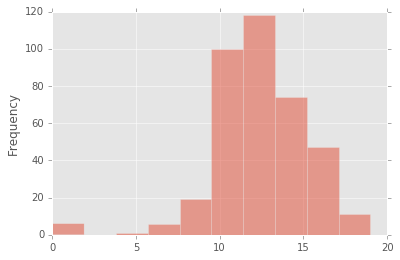

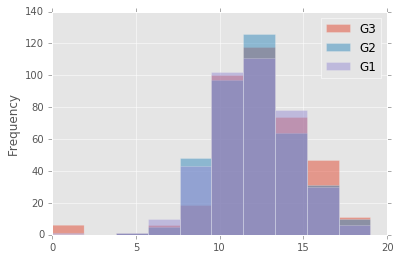

In [4]:
my_series.plot.hist(alpha=0.5)
my_dataframe.plot.hist(alpha=0.5)

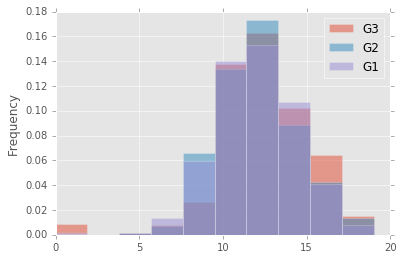

In [5]:
my_dataframe.plot.hist(alpha=0.5, normed=True) # dislaying probabilities instead of frequency

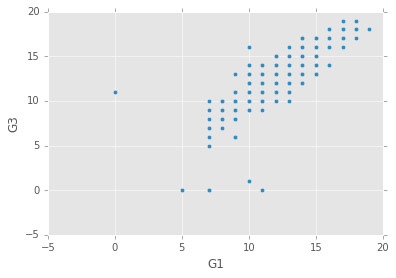

In [6]:
students.plot.scatter(x='G1', y = 'G3')

In [10]:
concrete = pd.read_csv("concrete.csv")
concrete.head()

,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


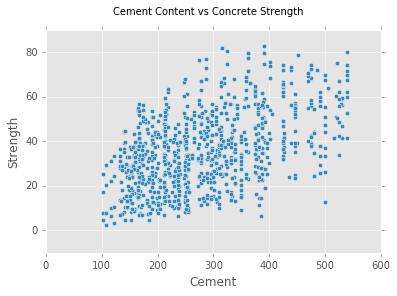

In [14]:
concrete.plot.scatter(x='Cement', y ='Strength')
plt.suptitle('Cement Content vs Concrete Strength')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

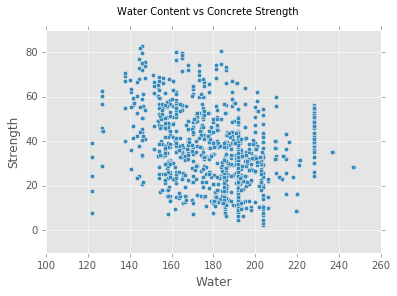

In [16]:
concrete.plot.scatter(x='Water', y = 'Strength')
plt.suptitle('Water Content vs Concrete Strength')
plt.xlabel("Water")
plt.ylabel("Strength")
plt.show()

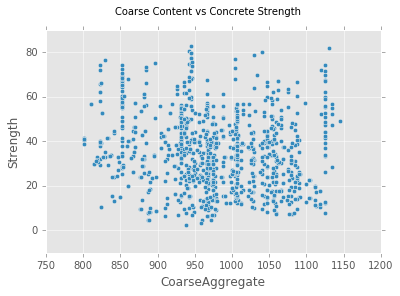

In [18]:
concrete.plot.scatter(x='CoarseAggregate', y = 'Strength')
plt.suptitle('Coarse Content vs Concrete Strength')
plt.xlabel("CoarseAggregate")
plt.ylabel("Strength")
plt.show()

In [42]:
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use("ggplot")  # Look pretty

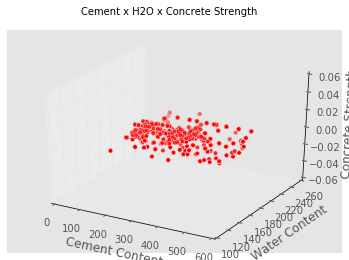

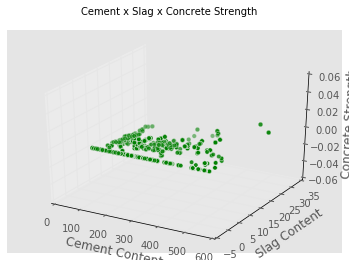

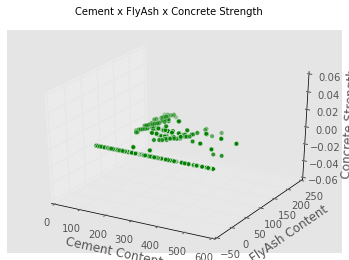

In [28]:
fig = plt.figure()
plt.suptitle('Cement x H2O x Concrete Strength')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Cement Content")
ax.set_ylabel("Water Content")
ax.set_zlabel('Concrete Strength')
ax.scatter(concrete.Cement, concrete.Water, c='r', marker='o')

fig = plt.figure()
plt.suptitle('Cement x Slag x Concrete Strength')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Cement Content")
ax.set_ylabel("Slag Content")
ax.set_zlabel('Concrete Strength')
ax.scatter(concrete.Cement, concrete.Superplasticizer, c='g', marker='o')

fig = plt.figure()
plt.suptitle('Cement x FlyAsh x Concrete Strength')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Cement Content")
ax.set_ylabel("FlyAsh Content")
ax.set_zlabel('Concrete Strength')
ax.scatter(concrete.Cement, concrete.FlyAsh, c='g', marker='o')

plt.show()

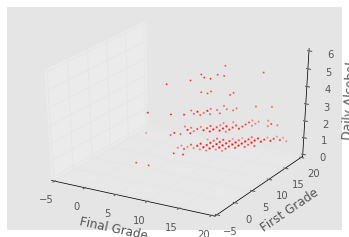

In [29]:
student_dataset = pd.read_csv("students.csv", index_col=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Final Grade')
ax.set_ylabel('First Grade')
ax.set_zlabel('Daily Alcohol')

ax.scatter(student_dataset.G1, student_dataset.G3, student_dataset['Dalc'], c='r', marker='.')
plt.show()

In [2]:
#Higer dimension visualization
from sklearn.datasets import load_iris
from pandas.tools.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
matplotlib.style.use('ggplot')

In [7]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target_names'] = [data.target_names[i] for i in data.target]

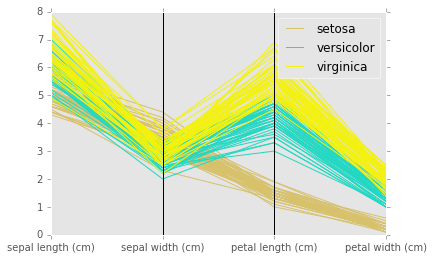

In [8]:
#parallel coordinates starts here
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

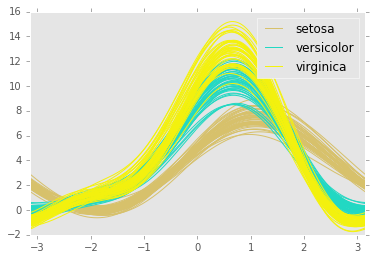

In [11]:
# Andrews Curves Start Here:
from pandas.tools.plotting import andrews_curves
plt.figure()
andrews_curves(df, 'target_names')
plt.show()

In [3]:
df = pd.read_csv('wheat.data')
df.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [53]:
area = df.loc[:, ['area', 'perimeter']]
area.head()

,area,perimeter
0,15.26,14.84
1,14.88,14.57
2,14.29,14.09
3,13.84,13.94
4,16.14,14.99


In [54]:
groove = df.loc[:, ['groove', 'asymmetry']]
groove.head()

,groove,asymmetry
0,5.220,2.221
1,4.956,1.018
2,4.825,2.699
3,4.805,2.259
4,5.175,1.355


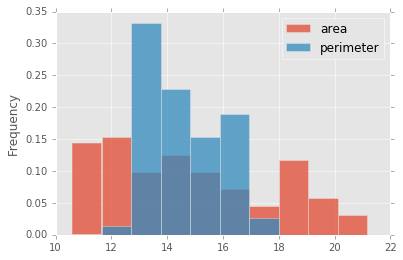

In [55]:
area.plot.hist(alpha=0.75, normed=True) 

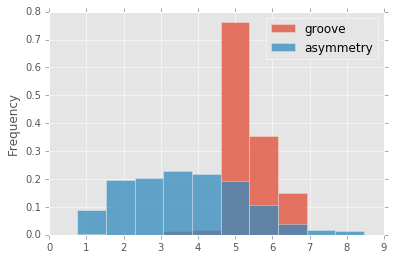

In [56]:
groove.plot.hist(alpha=0.75, normed=True) 

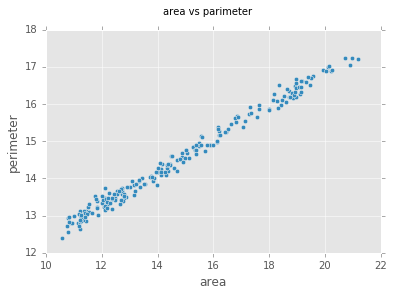

In [57]:
area.plot.scatter(x='area', y ='perimeter')
plt.suptitle('area vs parimeter')
plt.xlabel('area')
plt.ylabel('perimeter')
plt.show()

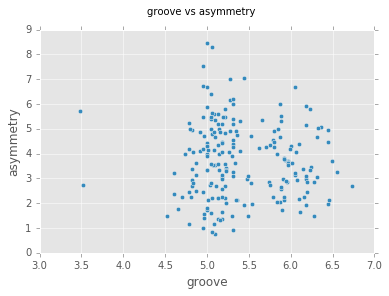

In [58]:
groove.plot.scatter(x='groove', y ='asymmetry')
plt.suptitle('groove vs asymmetry')
plt.xlabel('groove')
plt.ylabel('asymmetry')
plt.show()

In [59]:
compact = df.loc[:, ['compactness', 'width']]
compact.head()

,compactness,width
0,0.8710,3.312
1,0.8811,3.333
2,0.9050,3.337
3,0.8955,3.379
4,0.9034,3.562


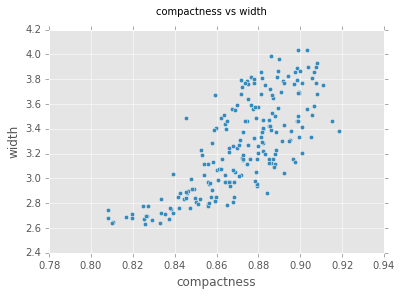

In [60]:
compact.plot.scatter(x='compactness', y ='width')
plt.suptitle('compactness vs width')
plt.xlabel('compactness')
plt.ylabel('width')
plt.show()

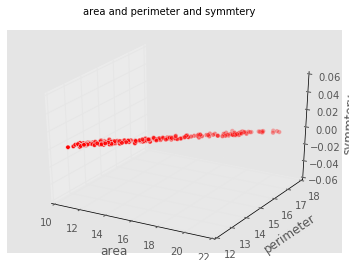

In [61]:
area_symmetry = df.loc[:, ['area', 'perimeter', 'symmetry']]
fig = plt.figure()
plt.suptitle('area and perimeter and symmtery')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("area")
ax.set_ylabel("perimeter")
ax.set_zlabel('symmtery')
ax.scatter(area_symmetry.area, area_symmetry.perimeter, c='r', marker='o')

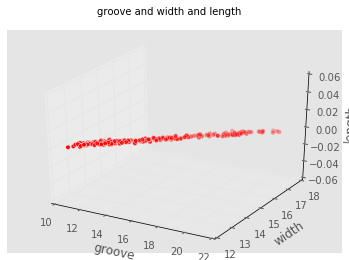

In [62]:
groove_width = df.loc[:, ['groove', 'width', 'length']]
fig = plt.figure()
plt.suptitle('groove and width and length')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("groove")
ax.set_ylabel("width")
ax.set_zlabel('length')
ax.scatter(area_symmetry.area, area_symmetry.perimeter, c='r', marker='o')

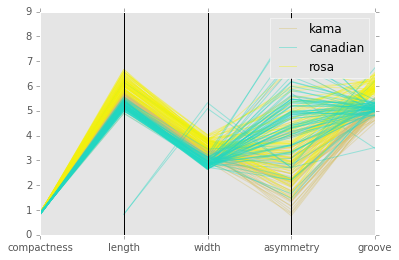

In [63]:
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)
plt.figure()
parallel_coordinates(df, 'wheat_type', alpha=0.4)
plt.show()

In [64]:
df.head()

,compactness,length,width,asymmetry,groove,wheat_type
0,0.8710,5.763,3.312,2.221,5.220,kama
1,0.8811,5.554,3.333,1.018,4.956,kama
2,0.9050,5.291,3.337,2.699,4.825,kama
3,0.8955,5.324,3.379,2.259,4.805,kama
4,0.9034,5.658,3.562,1.355,5.175,kama


In [65]:
df['area'] = area['area']
df['perimeter'] = area['perimeter']
df.head()

,compactness,length,width,asymmetry,groove,wheat_type,area,perimeter
0,0.8710,5.763,3.312,2.221,5.220,kama,15.26,14.84
1,0.8811,5.554,3.333,1.018,4.956,kama,14.88,14.57
2,0.9050,5.291,3.337,2.699,4.825,kama,14.29,14.09
3,0.8955,5.324,3.379,2.259,4.805,kama,13.84,13.94
4,0.9034,5.658,3.562,1.355,5.175,kama,16.14,14.99


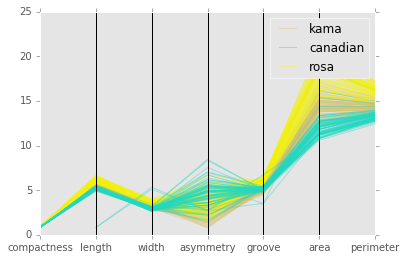

In [66]:
plt.figure()
parallel_coordinates(df, 'wheat_type', alpha=0.4)
plt.show()

In [71]:
df_corr = df.corr(method='pearson', min_periods=1)
print df_corr

             compactness    length     width  asymmetry    groove      area  \
compactness     1.000000  0.360060  0.756165  -0.315668  0.236184  0.600312   
length          0.360060  1.000000  0.197228  -0.102325  0.669887  0.645418   
width           0.756165  0.197228  1.000000  -0.249378  0.619865  0.801616   
asymmetry      -0.315668 -0.102325 -0.249378   1.000000 -0.039248 -0.205876   
groove          0.236184  0.669887  0.619865  -0.039248  1.000000  0.786096   
area            0.600312  0.645418  0.801616  -0.205876  0.786096  1.000000   
perimeter       0.520544  0.657490  0.783188  -0.196360  0.813256  0.994341   

             perimeter  
compactness   0.520544  
length        0.657490  
width         0.783188  
asymmetry    -0.196360  
groove        0.813256  
area          0.994341  
perimeter     1.000000  


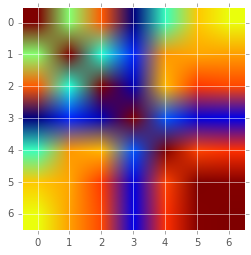

In [69]:
plt.imshow(df_corr)

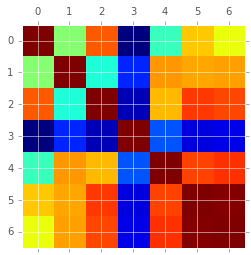

In [70]:
plt.matshow(df_corr)

In [109]:
#PCA - n_components parameter to the number of dimensions you wish to keep.
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)
df.shape
T.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [62]:
# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100

In [63]:
# Look pretty...
matplotlib.style.use('ggplot')

In [64]:
# Load up the scanned armadillo
plyfile = PlyData.read('stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

In [67]:
def do_PCA(armadillo):
    pca = PCA(n_components=2)
    armadillo_tr = pca.fit(armadillo).transform(armadillo)
    return armadillo_tr

In [76]:
def do_RandomizedPCA(armadillo):
    rpca = RandomizedPCA(n_components=2)
    armadillo_tr_rand = rpca.fit(armadillo).transform(armadillo)
    return armadillo_tr_rand

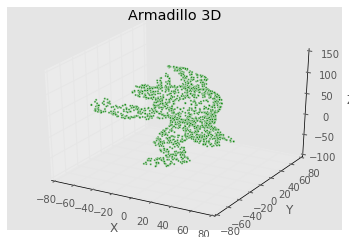

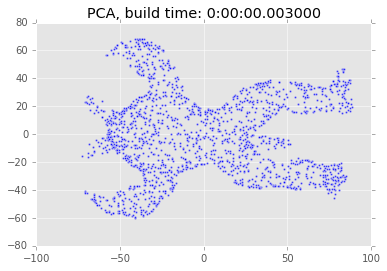

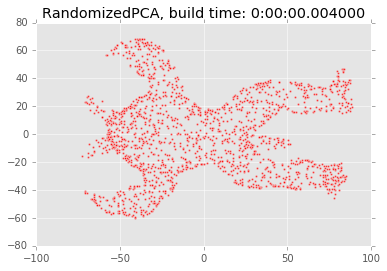

In [77]:
# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

# Render the newly transformed PCA armadillo!
t1 = datetime.datetime.now()
pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

# Render the newly transformed RandomizedPCA armadillo!
t1 = datetime.datetime.now()
rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
    
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper
matplotlib.style.use('ggplot')
%matplotlib inline

In [221]:
scaleFeatures = True

In [2]:
kidneydata = pd.read_csv('kidney_disease.csv')
kidneydata.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800.00,5.20,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000.00,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500.00,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700.00,3.90,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300.00,4.60,no,no,no,good,no,no,ckd


In [3]:
kidneydata = kidneydata.dropna(axis=0, how='any')

In [4]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
kidneydata['labels'] = ['red' if i=='ckd' else 'green' for i in kidneydata.classification]

In [5]:
kidneydata.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,labels
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700.00,3.90,yes,no,no,poor,yes,yes,ckd,red
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,12100.00,3.70,yes,yes,no,poor,no,yes,ckd,red
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,4500.00,3.80,yes,yes,no,poor,yes,no,ckd,red
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,11000.00,2.60,yes,yes,yes,poor,yes,no,ckd,red
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,9200.00,3.20,yes,yes,yes,poor,yes,yes,ckd,red


In [6]:
kidney_subset = kidneydata[['bgr', 'wc', 'rc', 'labels']]
kidney_subset.head()

,bgr,wc,rc,labels
3,117.0,6700.00,3.90,red
9,70.0,12100.00,3.70,red
11,380.0,4500.00,3.80,red
14,157.0,11000.00,2.60,red
20,173.0,9200.00,3.20,red


In [7]:
#kidney_subset_new = kidney_subset.dropna(axis=0, how='any')
kidney_subset_new = kidney_subset.dropna()

kidney_subset_new = kidney_subset.apply(lambda x: pd.to_numeric(x, errors='coerce'))
#print kidney_subset_new.dtypes
df = kidney_subset_new[['bgr', 'wc', 'rc']]
kidney_subset.head()

,bgr,wc,rc,labels
3,117.0,6700.00,3.90,red
9,70.0,12100.00,3.70,red
11,380.0,4500.00,3.80,red
14,157.0,11000.00,2.60,red
20,173.0,9200.00,3.20,red


In [8]:
df.bgr.var()

4217.181810852217

In [201]:
df.wc.var()

9777379.66620978

In [202]:
df.rc.var()

1.0391038458437476

In [222]:
if scaleFeatures:
    df = helper.scaleFeatures(df)

New Variances:
bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  9.345548e-17  1.068063e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00


In [223]:
pca = PCA(n_components=2)
T = pca.fit(df).transform(df)

Features by importance:
[(3.9998071556884853, 'wc'), (3.258887664121087, 'bgr'), (3.0097527529983648, 'rc')]


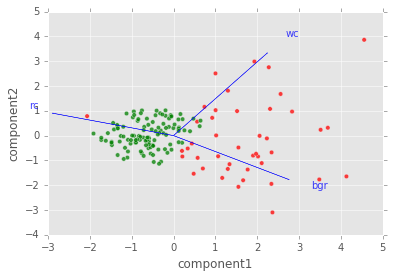

In [224]:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
labels = kidney_subset['labels']
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c= labels, alpha=0.75, ax=ax)
plt.show()

In [10]:
#ISO Map - Like PCA another method od dimensionality reduction
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=4,n_components=2)
iso.fit(df)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors=4,
    neighbors_algorithm='auto', path_method='auto', tol=0)

In [12]:
manifold = iso.transform(df)
print df.shape
print manifold.shape

(158, 3)
(158L, 2L)
